In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
rsd = pd.read_csv("Desktop/oasis projects data/retail_sales_dataset.csv")
rsd

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150


In [3]:
print(rsd.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
rsd.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150
999,1000,12-04-2023,CUST1000,Male,47,Electronics,4,30,120


In [5]:
print(rsd.shape)

(1000, 9)


In [6]:
print(rsd.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [7]:
print(rsd.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [8]:
rsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
print("missing values", rsd.isnull().sum())

missing values Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [10]:
rsd=rsd.drop_duplicates()

In [11]:
print(rsd["Date"].head(10))

0    24-11-2023
1    27-02-2023
2    13-01-2023
3    21-05-2023
4    06-05-2023
5    25-04-2023
6    13-03-2023
7    22-02-2023
8    13-12-2023
9    07-10-2023
Name: Date, dtype: object


# Descriptice Statistics

In [13]:
rsd.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# Basic Statisctics Calculations

In [15]:
print(f"average total amount: {(rsd['Total Amount'].mean())}")
print(f"median of total amount: {(rsd['Total Amount'].median())}")
print(f"mode of total amount:{(rsd['Total Amount'].mode())}")
print(f"standard deviation of total amount:{(rsd['Total Amount'].std())}")

average total amount: 456.0
median of total amount: 135.0
mode of total amount:0    50
Name: Total Amount, dtype: int64
standard deviation of total amount:559.997631555123


# Data Transformation

In [17]:
rsd["Date"] =  pd.to_datetime(rsd["Date"], errors = "coerce", dayfirst = True)   

In [18]:
rsd["Date"] = pd.to_datetime(rsd["Date"], errors = "coerce", format = "%d-%m-%y")

In [19]:
print(rsd["Date"])

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]


In [20]:
rsd.set_index("Date", inplace=True)
rsd = rsd.sort_index()

In [21]:
rsd

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-01-01,522,CUST522,Male,46,Beauty,3,500,1500
2023-01-01,180,CUST180,Male,41,Clothing,3,300,900
2023-01-01,559,CUST559,Female,40,Clothing,4,300,1200
2023-01-02,303,CUST303,Male,19,Electronics,3,30,90
2023-01-02,979,CUST979,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...,...
2023-12-29,233,CUST233,Female,51,Beauty,2,300,600
2023-12-29,805,CUST805,Female,30,Beauty,3,500,1500
2023-12-31,857,CUST857,Male,60,Electronics,2,25,50


In [22]:
print(rsd.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2024-01-01
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Customer ID       1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 70.3+ KB
None


In [23]:
print(rsd.head())

            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-01-01             522     CUST522    Male   46           Beauty   
2023-01-01             180     CUST180    Male   41         Clothing   
2023-01-01             559     CUST559  Female   40         Clothing   
2023-01-02             303     CUST303    Male   19      Electronics   
2023-01-02             979     CUST979  Female   19           Beauty   

            Quantity  Price per Unit  Total Amount  
Date                                                
2023-01-01         3             500          1500  
2023-01-01         3             300           900  
2023-01-01         4             300          1200  
2023-01-02         3              30            90  
2023-01-02         1              25            25  


# Correlation

In [25]:
numeric_data=rsd.select_dtypes(include=["number"])
num_data = rsd.drop(columns=['Transaction ID'])

In [26]:
rsd['Quantity'] = pd.to_numeric(rsd['Quantity'], errors='coerce')
rsd['Price per Unit'] = pd.to_numeric(rsd['Price per Unit'], errors='coerce')
rsd['Total Amount'] = pd.to_numeric(rsd['Total Amount'], errors='coerce')

In [27]:
numeric_data = num_data.select_dtypes(include=['number'])
correlation = numeric_data.corr()
print(correlation)

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


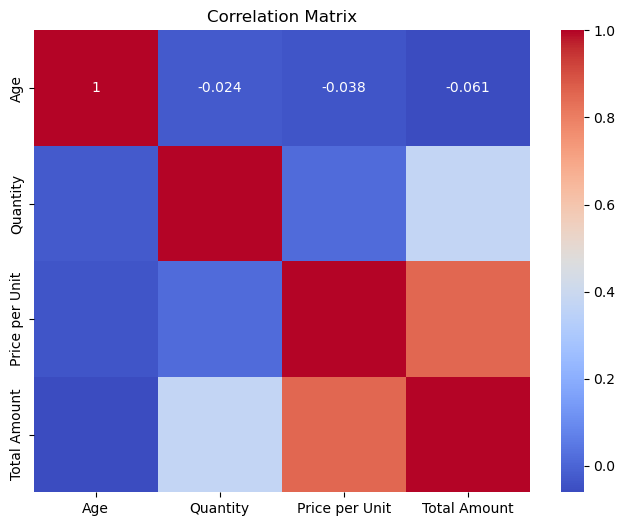

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Summary:

Age vs Other Columns:

Age and Quantity: Correlation = -0.024 No significant relationship.

Age and Price per Unit: Correlation = -0.038 Negligible relationship.

Age and Total Amount: Correlation = -0.061 Slight negative correlation, negligible effect.

Conclusion: Age has no significant correlation with other variables.

Quantity vs Other Columns:

Quantity and Price per Unit: Correlation = ~0.0 No clear relationship.

Quantity and Total Amount: Correlation = ~0.4 Moderate positive correlation. As Quantity increases, Total Amount increases.

Price per Unit vs Total Amount:

Correlation = 0.8+ (strong positive)

Strong positive relationship between Price per Unit and Total Amount.

Conclusion: Price per Unit has a significant impact on Total Amount.

# Time Series Analysis

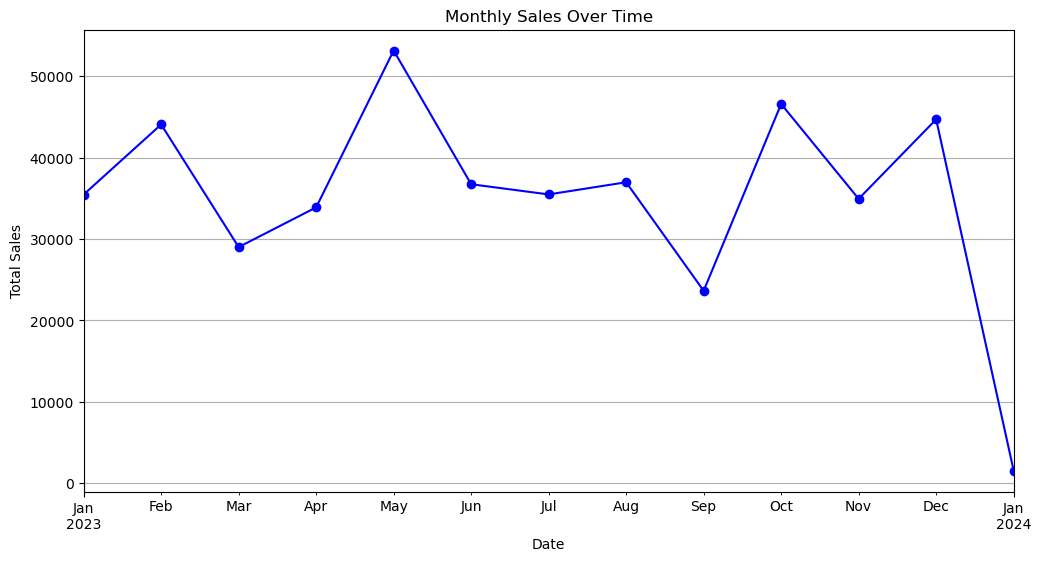

In [31]:
monthly_sales = rsd["Total Amount"].resample("M").sum()
monthly_sales.plot(figsize=(12,6), marker="o", linestyle="-", color="blue")
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [32]:
monthly_sales = rsd["Total Amount"].resample("M").sum()
print(monthly_sales.head())

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
Freq: M, Name: Total Amount, dtype: int64


Apply rolling mean (6-month moving average)
Plot actual vs rolling mean


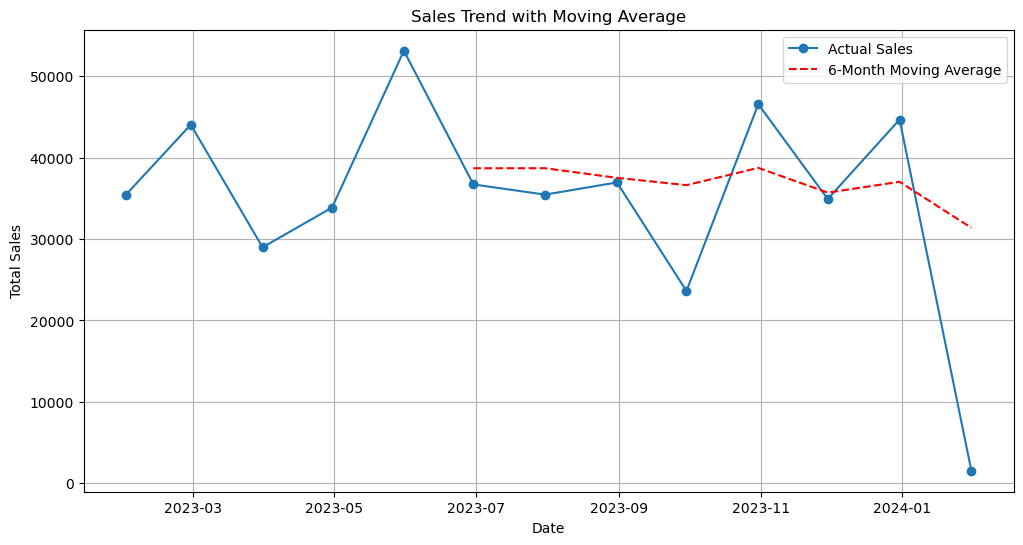

In [33]:
import matplotlib.pyplot as plt

print("Apply rolling mean (6-month moving average)")
monthly_sales_rolling = monthly_sales.rolling(window=6).mean()

print("Plot actual vs rolling mean")
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Actual Sales", marker="o", linestyle="-")
plt.plot(monthly_sales_rolling, label="6-Month Moving Average", linestyle="dashed", color="red")
plt.title("Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(monthly_sales.dropna())  # Droped Null values

print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

if adf_test[1] <= 0.05:
    print("The data is stationary (reject H0).") 
else:
    print("The data is non-stationary (fail to reject H0). Consider differencing.")

ADF Test Statistic: -3.6702088100655894
p-value: 0.0045522517976560725
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
The data is stationary (reject H0).


Forecast for next 12 months


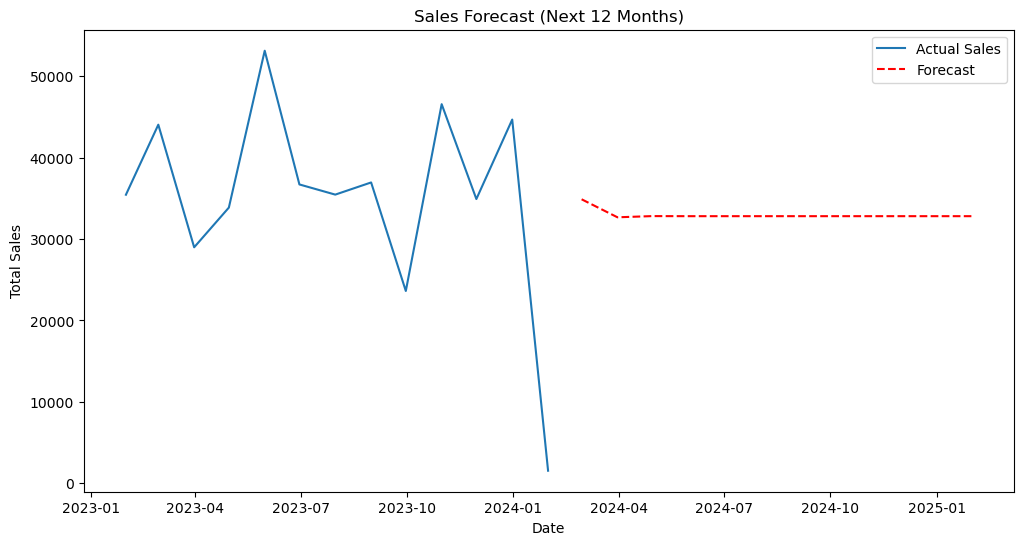

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

print("Forecast for next 12 months")
forecast = model_fit.forecast(steps=12)


plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Actual Sales")
plt.plot(forecast, label="Forecast", linestyle="dashed", color="red")
plt.title("Sales Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

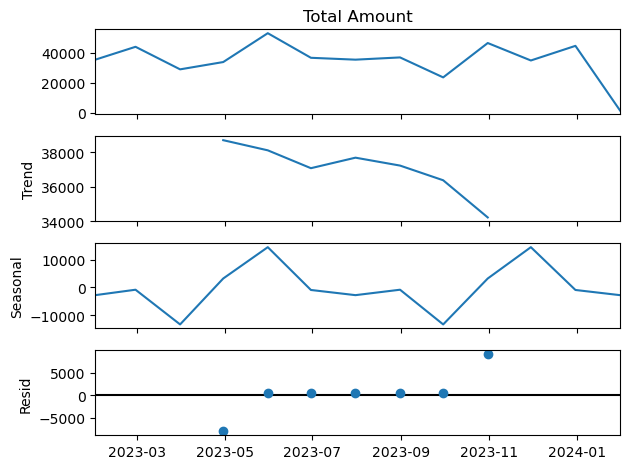

In [37]:
sd_sales = seasonal_decompose(monthly_sales, model='additive', period = 6)
sd_sales.plot()
plt.show()

Trend Analysis Insights:
Overall Trend:
Sales have been slowly decreasing over time, especially in late 2023 and early 2024. This could be due to:

- Market saturation (too many products)
- Reduced demand
- External economic factors (like recession)

Seasonality:
Sales go up and down at regular times of the year. This is likely because:

- People buy more during holidays and festivals
- Sales drop after these periods

Residual Component:
The model has captured most patterns, but some unexpected events (outliers) affected sales.

Business Recommendations:
1. Find out why sales are decreasing (internal or external factors).
2. Run promotional campaigns or diversify products.
3. Prepare for demand spikes by increasing inventory and optimizing marketing during peak months.
4. Plan strategies to reduce expenses.
5. Be prepared for unexpected market shocks or anomalies.


In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Customer and Product Analysis
Analyzed customer demographics and purchasing behavior.

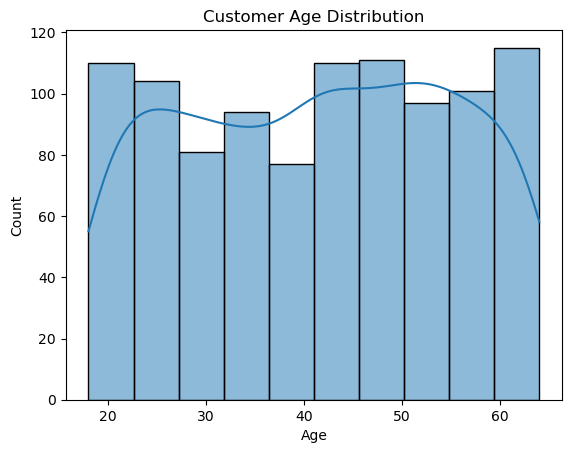

In [41]:
sns.histplot(rsd["Age"], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.show()

In [42]:
rsd['Spending_Category'] = pd.qcut(rsd['Total Amount'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
rsd

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Spending_Category
Date,,,,,,,,,
2023-01-01,522,CUST522,Male,46,Beauty,3,500,1500,Premium
2023-01-01,180,CUST180,Male,41,Clothing,3,300,900,High
2023-01-01,559,CUST559,Female,40,Clothing,4,300,1200,Premium
2023-01-02,303,CUST303,Male,19,Electronics,3,30,90,Medium
2023-01-02,979,CUST979,Female,19,Beauty,1,25,25,Low
...,...,...,...,...,...,...,...,...,...
2023-12-29,233,CUST233,Female,51,Beauty,2,300,600,High
2023-12-29,805,CUST805,Female,30,Beauty,3,500,1500,Premium
2023-12-31,857,CUST857,Male,60,Electronics,2,25,50,Low


In [43]:
#Purchase frequency per customer
customer_frequency = rsd.groupby('Customer ID')['Transaction ID'].count()

#Total Spending per Customer
customer_spending = rsd.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)

# Average Order Value 
aov = rsd.groupby('Customer ID')['Total Amount'].mean()

#Customer segmentation based on spending
rsd['Spending_Category'] = pd.qcut(rsd['Total Amount'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

# Gender-based spending trends
gender_spending = rsd.groupby('Gender')['Total Amount'].sum()


In [44]:
# Age group segmentation
rsd['Age Group'] = pd.cut(rsd['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

age_spending = rsd.groupby('Age Group', observed = True)['Total Amount'].sum()

print(customer_frequency, gender_spending, age_spending)

Customer ID
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
          ..
CUST995    1
CUST996    1
CUST997    1
CUST998    1
CUST999    1
Name: Transaction ID, Length: 1000, dtype: int64 Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64 Age Group
18-30    121730
30-40     95950
40-50     93795
50-60    100085
60+       33225
Name: Total Amount, dtype: int64


In [45]:
print("Most Frequent Product Category per Customer")
customer_top_category = rsd.groupby(['Customer ID', 'Product Category'])['Quantity'].sum().reset_index()
customer_top_category = customer_top_category.loc[customer_top_category.groupby('Customer ID')['Quantity'].idxmax()]
customer_top_category

Most Frequent Product Category per Customer


,Customer ID,Product Category,Quantity
0,CUST001,Beauty,3
1,CUST002,Clothing,2
2,CUST003,Electronics,1
3,CUST004,Clothing,1
4,CUST005,Beauty,2
...,...,...,...
995,CUST995,Clothing,1
996,CUST996,Clothing,1
997,CUST997,Beauty,3
998,CUST998,Beauty,4


In [46]:
# Combined all insights into a single DataFrame
customer_analysis = pd.DataFrame({
    'Total Spending': customer_spending,
    'Purchase Frequency': customer_frequency,
    'Average Order Value': aov
}).reset_index()

# Merged with most frequent product category in customer_analysis
customer_analysis = customer_analysis.merge(customer_top_category[['Customer ID', 'Product Category']], on='Customer ID', how='left')

# Categorized customers based on spending
customer_analysis['Customer Segment'] = pd.qcut(customer_analysis['Total Spending'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

print("OUTPUT")
print(customer_analysis.head())

OUTPUT
  Customer ID  Total Spending  Purchase Frequency  Average Order Value  \
0     CUST001             150                   1                150.0   
1     CUST002            1000                   1               1000.0   
2     CUST003              30                   1                 30.0   
3     CUST004             500                   1                500.0   
4     CUST005             100                   1                100.0   

  Product Category Customer Segment  
0           Beauty             High  
1         Clothing          Premium  
2      Electronics              Low  
3         Clothing             High  
4           Beauty           Medium  


In [47]:
# Top-selling products
top_products = rsd.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Revenue per product category
product_revenue = rsd.groupby('Product Category')['Total Amount'].sum()

# Price sensitivity: Relationship between price and quantity sold
price_sensitivity = rsd.groupby('Price per Unit')['Quantity'].sum()

# Product preference by gender
product_gender = rsd.groupby(['Gender', 'Product Category'])['Quantity'].sum().unstack()


print(top_products.head(), product_revenue, price_sensitivity, product_gender)


Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64 Price per Unit
25     522
30     445
50     534
300    518
500    495
Name: Quantity, dtype: int64 Product Category  Beauty  Clothing  Electronics
Gender                                         
Female               418       441          439
Male                 353       453          410


Revenue by product category


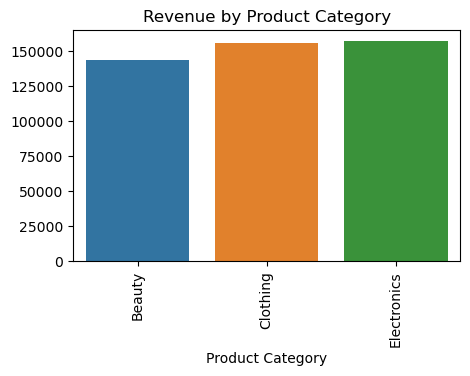

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Revenue by product category")
plt.figure(figsize=(5, 3))
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.xticks(rotation=90)
plt.title("Revenue by Product Category")
plt.show()

Customer spending distribution


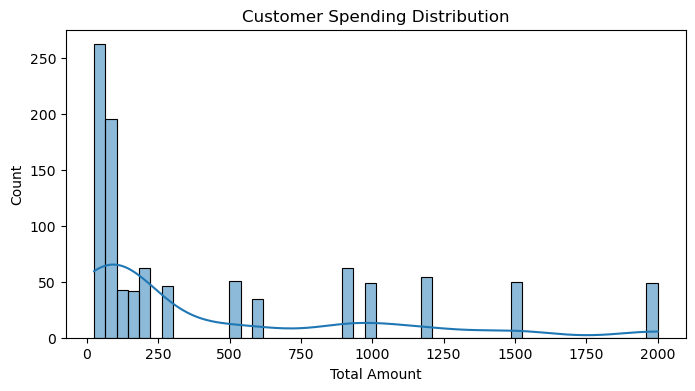

In [49]:
print("Customer spending distribution")
plt.figure(figsize=(8, 4))
sns.histplot(rsd['Total Amount'], bins=50, kde=True)
plt.title("Customer Spending Distribution")
plt.show()

Age group spending


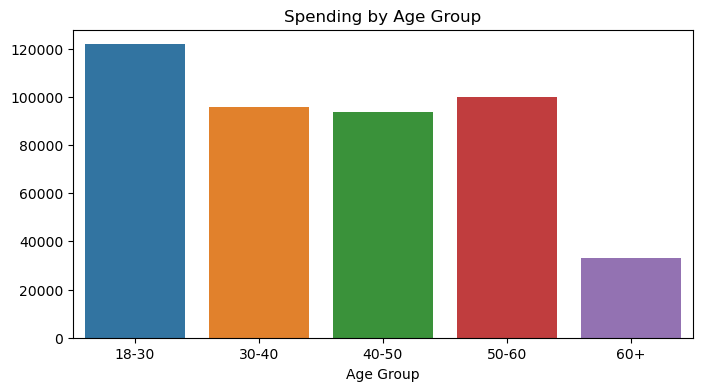

In [50]:
print("Age group spending")
plt.figure(figsize=(8, 4))
sns.barplot(x=age_spending.index, y=age_spending.values)
plt.title("Spending by Age Group")
plt.show()

# Customer Spending and Revenue Analysis

*Key Insights*:
1. Spending by Age Group
The 18-30 age group has the highest spending at 121,730, indicating that young adults are the most valuable customer segment.
The 30-40, 40-50, and 50-60 age groups have similar spending patterns, each contributing significantly to revenue.
The 60+ age group spends the least (33,225), suggesting lower engagement from older customers.
2. Customer Spending Distribution
A large number of customers spend small amounts (under 250), with a few making high-value purchases.
Spending is highly skewed, meaning a small group of customers contribute significantly to total revenue.
The presence of spending peaks at intervals (e.g., 500, 1000, 2000) suggests that customers often purchase in specific price brackets.
3. Revenue by Product Category
Clothing (155,580), Electronics (156,905), and Beauty (143,515) contribute almost equally to total revenue.
Clothing has the highest total revenue, but Electronics follows closely, making it a key category to focus on.
4. Customer Age Distribution
The customer base is evenly distributed across different age groups, with slightly higher concentrations in younger and older demographics.
This suggests a broad appeal of products across age groups but more engagement in younger and older customers.
5. Spending by Gender
Female customers contribute slightly more (232,840) compared to male customers (223,160).
Women dominate in Beauty products, while men tend to spend more on Electronics.
Both genders show nearly equal engagement in Clothing purchases.
6. Product Sales Analysis
Clothing has the highest quantity sold (894), followed by Electronics (849) and Beauty (771).
This suggests high demand for Clothing items, making it the most frequently purchased category.
The most commonly purchased price points include 25, 30, 50, 300, and 500, indicating popular price segments.

 # Business Recommendations Based on My Analysis

 
* Focus on Young Adults (18-30) – They spend the most, so offer exclusive discounts & trendy collections to increase sales.

* Boost Clothing, Electronics & Beauty Sales – These are top categories, so promote them with seasonal sales & bundle offers.

* Improve Older Customer Engagement (60+) – They spend the least, so offer senior discounts & easy shopping options.

* Optimize Pricing Strategy – Customers prefer ₹500, ₹1000, ₹2000 price points, so create special deals & free shipping above ₹500.

* Gender-Based Promotions – Women prefer Beauty, so run targeted ads & beauty combos.
                             Men prefer Electronics, so promote new gadgets & tech offers.
                             
* Encourage Higher Spending – Since most customers spend small amounts, introduce loyalty rewards & exclusive VIP discounts.

* Impact: Higher engagement, better customer targeting, and increased revenue! 